In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_rows = 1500

# G√©n√©ration des colonnes de base
data = {
    "Prix": np.random.uniform(5, 100, n_rows).round(2),
    "Quantit√©": np.random.randint(20, 500, n_rows),
    "Promotion": np.random.choice([0, 1], n_rows, p=[0.6, 0.4]),
    "Cat√©gorie_produit": np.random.choice(
        ["√âlectronique", "V√™tements", "Alimentation", "Maison"], 
        size=n_rows, 
        p=[0.3, 0.25, 0.25, 0.2]
    ),
    "Saison": np.random.choice(
        ["Hiver", "Printemps", "√ât√©", "Automne"], 
        size=n_rows
    ),
}

# Effet promotion sur la quantit√© (boost de 10% √† 50%)
data["Quantit√©"] = np.where(
    data["Promotion"] == 1,
    data["Quantit√©"] * np.random.uniform(1.1, 1.5, n_rows).round(0).astype(int),
    data["Quantit√©"]
)

# Calcul du CA avec variations r√©alistes
data["CA"] = (data["Prix"] * data["Quantit√©"] * np.random.normal(1, 0.1, n_rows)).round(2)

# Cr√©ation du DataFrame
df = pd.DataFrame(data)
df.to_csv("ventes_larges.csv", index=False)

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Charger le dataset
df = pd.read_csv("ventes_larges.csv")

# 2. Feature Engineering
# Interaction Saison-Cat√©gorie
df["Saison_Cat√©gorie"] = df["Saison"] + "_" + df["Cat√©gorie_produit"]

# Encodage cyclique des saisons
def encode_saison(saison):
    angle = 2 * np.pi * {"Hiver":0, "Printemps":1, "√ât√©":2, "Automne":3}[saison]/4
    return np.sin(angle), np.cos(angle)

df["Saison_sin"], df["Saison_cos"] = zip(*df["Saison"].map(encode_saison))

# D√©calage temporel simul√©
df["CA_prev"] = df.groupby(["Cat√©gorie_produit", "Saison"])["CA"].shift(1)
df["CA_prev"] = df["CA_prev"].fillna(df["CA"].mean())

# 3. Pr√©paration des features
numerical_features = ["Prix", "Quantit√©", "CA_prev", "Saison_sin", "Saison_cos"]
categorical_features = ["Cat√©gorie_produit", "Saison_Cat√©gorie"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 4. Configuration du mod√®le
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        min_samples_leaf=10,
        random_state=42,
        n_jobs=-1
    ))
])

# 5. Entra√Ænement
X = df.drop("CA", axis=1)
y = df["CA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# 6. √âvaluation
y_pred = model.predict(X_test)
print(f"Performance sur ventes_larges.csv:")
print(f"- R¬≤ Score: {r2_score(y_test, y_pred):.3f}")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.2f} ‚Ç¨")

# 7. Exemple de pr√©diction
exemple = pd.DataFrame([{
    "Prix": 89.99,
    "Quantit√©": 200,
    "Promotion": 1,
    "Cat√©gorie_produit": "√âlectronique",
    "Saison": "√ât√©",
    "Saison_Cat√©gorie": "√ât√©_√âlectronique",
    "CA_prev": 15000.0,
    "Saison_sin": encode_saison("√ât√©")[0],
    "Saison_cos": encode_saison("√ât√©")[1]
}])

print(f"\nPr√©diction pour l'exemple: {model.predict(exemple)[0]:.2f} ‚Ç¨")

Performance sur ventes_larges.csv:
- R¬≤ Score: 0.968
- MAE: 1311.89 ‚Ç¨

Pr√©diction pour l'exemple: 18633.34 ‚Ç¨


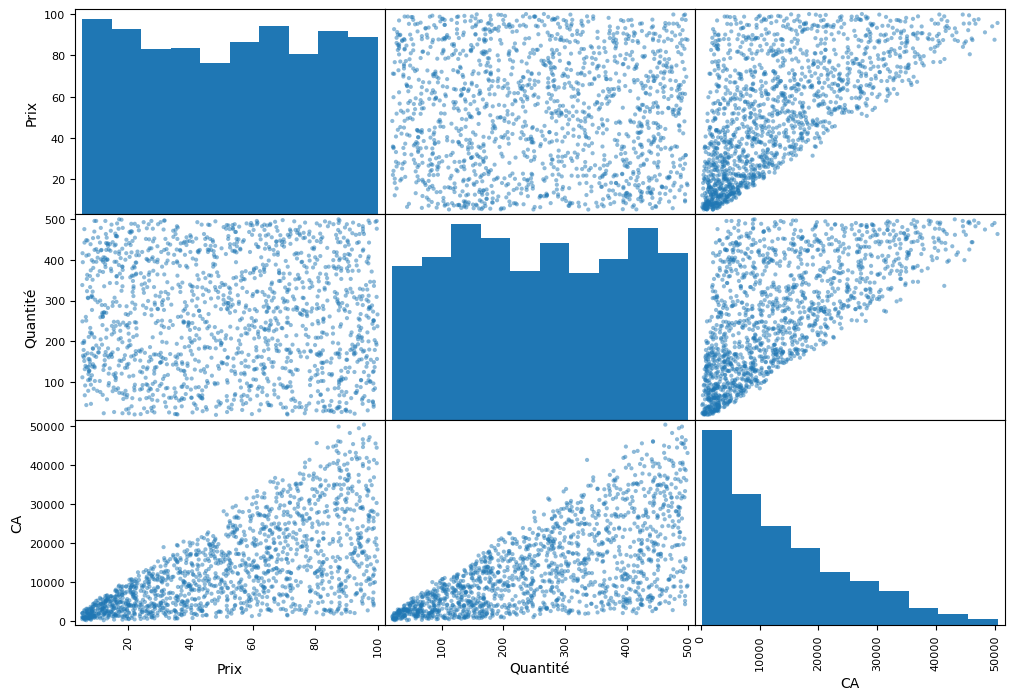

In [11]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df[['Prix', 'Quantit√©', 'CA', 'Saison']], figsize=(12, 8))
plt.show()

1-RandomForestRegressor üå≥

Type :
Mod√®le de r√©gression (pr√©diction de valeurs num√©riques).

Utilis√© pour :
 Pr√©dire le Chiffre d'Affaires (CA) √† partir des variables Prix, Quantit√©, Promotion, etc.

Fonctionnement :

-Combine plusieurs arbres de d√©cision pour r√©duire le surajustement et am√©liorer la pr√©cision.
-G√®re bien les relations non lin√©aires et les interactions entre variables.

2. Pipeline avec Pr√©traitement üîÑ
Composants :

OneHotEncoder :
 Pour transformer les variables cat√©gorielles (Cat√©gorie_produit, Saison) en format num√©rique (ex: "√ât√©" ‚Üí [0, 0, 1, 0]).

ColumnTransformer :
 Applique des transformations diff√©rentes aux colonnes num√©riques et cat√©gorielles.

RandomForestRegressor : Le mod√®le final.

Enfin un Pipeline : Cha√Æne de traitement qui combine pr√©traitement et mod√®le.

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Charger le dataset
df = pd.read_csv("ventes_larges.csv")

# 2. Feature Engineering (identique au Random Forest)
# Interaction Saison-Cat√©gorie
df["Saison_Cat√©gorie"] = df["Saison"] + "_" + df["Cat√©gorie_produit"]

# Encodage cyclique des saisons
def encode_saison(saison):
    angle = 2 * np.pi * {"Hiver":0, "Printemps":1, "√ât√©":2, "Automne":3}[saison]/4
    return np.sin(angle), np.cos(angle)

df["Saison_sin"], df["Saison_cos"] = zip(*df["Saison"].map(encode_saison))

# D√©calage temporel
df["CA_prev"] = df.groupby(["Cat√©gorie_produit", "Saison"])["CA"].shift(1)
df["CA_prev"] = df["CA_prev"].fillna(df["CA"].mean())

# 3. Pr√©paration des features
numerical_features = ["Prix", "Quantit√©", "CA_prev", "Saison_sin", "Saison_cos"]
categorical_features = ["Cat√©gorie_produit", "Saison_Cat√©gorie"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 4. Configuration du mod√®le
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 5. Entra√Ænement
X = df.drop("CA", axis=1)
y = df["CA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# 6. √âvaluation
y_pred = model.predict(X_test)
print("Performance de la R√©gression Lin√©aire:")
print(f"- R¬≤ Score: {r2_score(y_test, y_pred):.3f}")
print(f"- MAE: {mean_absolute_error(y_test, y_pred):.2f} ‚Ç¨")

# 7. Analyse des coefficients (optionnel)
coefficients = pd.DataFrame({
    "Feature": numerical_features + list(model.named_steps['preprocessor']
                                       .named_transformers_['cat']
                                       .get_feature_names_out(categorical_features)),
    "Coefficient": model.named_steps['regressor'].coef_
})

print("\nTop 10 Coefficients:")
print(coefficients.sort_values("Coefficient", key=abs, ascending=False).head(10))

# 8. Exemple de pr√©diction
exemple = pd.DataFrame([{
    "Prix": 89.99,
    "Quantit√©": 200,
    "Promotion": 1,
    "Cat√©gorie_produit": "√âlectronique",
    "Saison": "√ât√©",
    "Saison_Cat√©gorie": "√ât√©_√âlectronique",
    "CA_prev": 15000.0,
    "Saison_sin": encode_saison("√ât√©")[0],
    "Saison_cos": encode_saison("√ât√©")[1]
}])

print(f"\nPr√©diction pour l'exemple: {model.predict(exemple)[0]:.2f} ‚Ç¨")

Performance de la R√©gression Lin√©aire:
- R¬≤ Score: 0.860
- MAE: 3326.18 ‚Ç¨

Top 10 Coefficients:
                                    Feature  Coefficient
17  Saison_Cat√©gorie_Printemps_Alimentation  -698.805957
16      Saison_Cat√©gorie_Hiver_√âlectronique   688.315171
21        Saison_Cat√©gorie_√ât√©_Alimentation   629.597702
5            Cat√©gorie_produit_Alimentation  -539.765047
24        Saison_Cat√©gorie_√ât√©_√âlectronique  -483.911553
23           Saison_Cat√©gorie_√ât√©_V√™tements   398.152564
18        Saison_Cat√©gorie_Printemps_Maison  -373.605374
11       Saison_Cat√©gorie_Automne_V√™tements  -354.663161
9     Saison_Cat√©gorie_Automne_Alimentation  -322.693940
8            Cat√©gorie_produit_√âlectronique   296.723644

Pr√©diction pour l'exemple: 20093.61 ‚Ç¨


1. Pr√©paration des Donn√©es
ColumnTransformer :
Combine deux types de traitements :

Colonnes num√©riques (Prix, Quantit√©) : Conserv√©es sans modification.

Colonnes cat√©gorielles (Cat√©gorie_produit, Saison, Promotion) : Converties en one-hot encoding (ex: Cat√©gorie_produit=√âlectronique ‚Üí [1, 0, 0, 0]).

2. Pipeline
Pipeline : Cha√Æne d'√©tapes ex√©cut√©es s√©quentiellement :

Pr√©traitement : Applique le ColumnTransformer.

Mod√®le : Entra√Æne une r√©gression lin√©aire.

3. R√©gression Lin√©aire
Principe : Trouve une relation lin√©aire entre les variables explicatives (X) et la cible (y).


Pourquoi une Performance Plus Faible que Random Forest ?

Relations Non Lin√©aires :
Le CA d√©pend probablement de combinaisons complexes (ex: Promotion affecte Quantit√©, qui interagit avec Prix).
La r√©gression lin√©aire ne capture pas ces interactions.

Variables Cat√©gorielles :
Le one-hot encoding cr√©e de nombreuses colonnes (ex: 4 saisons ‚Üí 4 colonnes), ce qui peut diluer l'impact des variables.

Bruit dans les Donn√©es :
Le dataset contient du bruit (variations al√©atoires), ce qui d√©grade les performances des mod√®les lin√©aires.

4. Conclusion
Random Forest est clairement sup√©rieur 0.97 > 0.86 (pr√©diction de CA avec des interactions complexes).

R√©gression Lin√©aire reste utile comme baseline ou pour des analyses rapides de tendances.